 -----------------------
 **Problema** : 
 
Utilizaremos o dataset de Multi-Classes Iris.


É um dos datasets mais utilizados em problemas de classificação multi-casse.
 
 
A partir dos valores de comprimento e largura da sépala e pétalas de cada planta Iris, podemos classifica-la entre 3 variedades diferentes:

* Setosa
* Versicolore 
* Virginica



In [ ]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

### Carregando os Dados

In [6]:
df = pd.read_csv("../dataset/iris.csv", header=0)
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   150         150 non-null    float64
 1   4           150 non-null    float64
 2   setosa      150 non-null    float64
 3   versicolor  150 non-null    float64
 4   virginica   150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Separando Dados

In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Selecionando os 2 primeiros componentes do PCA

In [12]:
X_pca = PCA().fit_transform(X)

print(X.shape)

X_selected = X_pca[:,:2]

print(X_selected.shape)

(150, 4)
(150, 2)


### Treinando Classificador SVM

In [13]:
# Definir variáveis para meshgrid
h = .01
x_min, x_max = -4,4
y_min, y_max = -1.5, 1.5


clf = SVC(kernel='rbf', max_iter=1500)
clf.fit(X_selected, y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

### Plotando Caracterísitcas em um Plano

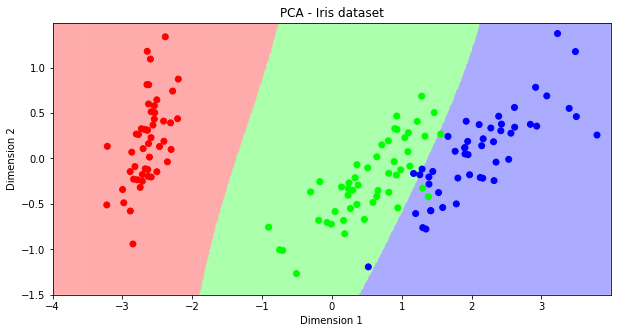

Acc: 96.0%


In [18]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(10,5))
plt.pcolormesh(xx, yy, Z, alpha=.6,cmap=cmap_light)
plt.title('PCA - Iris dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap=cmap_bold)
plt.show()


preds = clf.predict(X_selected)
acc = accuracy_score(preds, y)
print(f"Acc: {acc*100}%")

### Treinando Classificador MLP

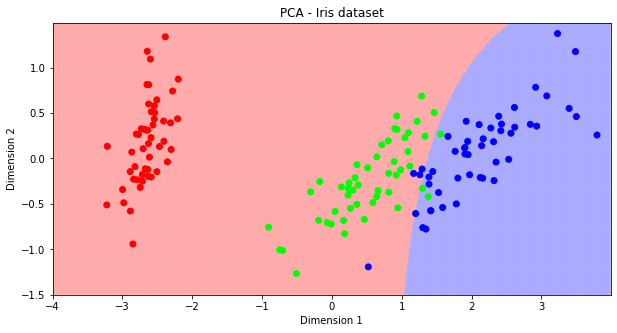

In [72]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(hidden_layer_sizes=25,
                    activation="tanh",
                    solver='sgd',
                    max_iter=10)
clf.fit(X_selected, y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(10,5))
plt.pcolormesh(xx, yy, Z, alpha=.6,cmap=cmap_light)
plt.title('PCA - Iris dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap=cmap_bold)
plt.show()

### Treinando Classificador RandomForest

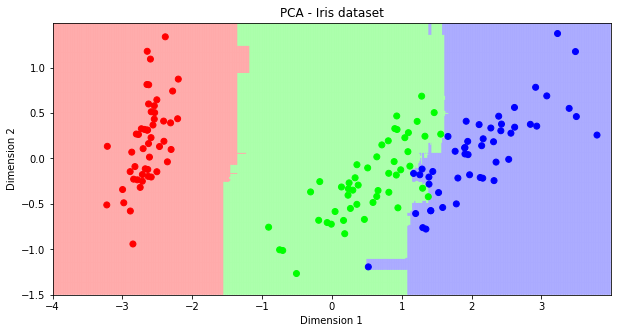

In [74]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_selected, y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.figure(figsize=(10,5))
plt.pcolormesh(xx, yy, Z, alpha=.6,cmap=cmap_light)
plt.title('PCA - Iris dataset')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap=cmap_bold)
plt.show()